In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import os

path = os.path.join("dataset", "train.csv")

In [3]:
data = pd.read_csv(path)
data.head(3)

C:\Users\ishin\AppData\Local\Temp\ipykernel_16684\3246910183.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0


In [4]:
data.shape

(110938, 190)

In [23]:
data.dropna(inplace= True)
data.shape

(64117, 187)

# Features in original dataset

In [24]:
for i in data.columns:
    print(i)

id
target
match_date
league_id
is_cup
home_team_coach_id
away_team_coach_id
home_team_history_match_date_1
home_team_history_match_date_2
home_team_history_match_date_3
home_team_history_match_date_4
home_team_history_match_date_5
home_team_history_match_date_6
home_team_history_match_date_7
home_team_history_match_date_8
home_team_history_match_date_9
home_team_history_match_date_10
home_team_history_is_play_home_1
home_team_history_is_play_home_2
home_team_history_is_play_home_3
home_team_history_is_play_home_4
home_team_history_is_play_home_5
home_team_history_is_play_home_6
home_team_history_is_play_home_7
home_team_history_is_play_home_8
home_team_history_is_play_home_9
home_team_history_is_play_home_10
home_team_history_is_cup_1
home_team_history_is_cup_2
home_team_history_is_cup_3
home_team_history_is_cup_4
home_team_history_is_cup_5
home_team_history_is_cup_6
home_team_history_is_cup_7
home_team_history_is_cup_8
home_team_history_is_cup_9
home_team_history_is_cup_10
home_team_h

In [25]:
data = data.drop(columns= ["home_team_name", "away_team_name", "league_name"])

KeyError: "['home_team_name', 'away_team_name', 'league_name'] not found in axis"

In [ ]:
print(data.isna().sum().value_counts)

<bound method IndexOpsMixin.value_counts of id                                    0
target                                0
match_date                            0
league_id                             0
is_cup                                1
                                  ...  
away_team_history_league_id_6      8426
away_team_history_league_id_7      9867
away_team_history_league_id_8     11295
away_team_history_league_id_9     12762
away_team_history_league_id_10    14216
Length: 187, dtype: int64>


<AxesSubplot:xlabel='target', ylabel='Count'>

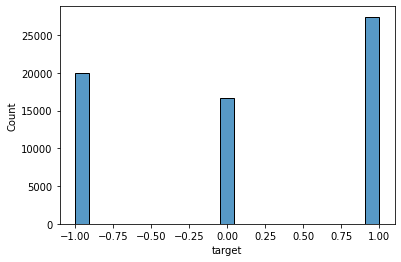

In [26]:
# "target" to categorial ['away' = -1, 'home' = 1, 'draw' = 0]

data["target"] = np.where(data["target"] == "away", -1, data["target"])
data["target"] = np.where(data["target"] == "home", 1, data["target"])
data["target"] = np.where(data["target"] == "draw", 0, data["target"])

sns.histplot(data= data["target"])

In [27]:
train_set = data[['target',
'home_team_history_rating_1',
 'home_team_history_rating_2',
 'home_team_history_rating_3',
 'home_team_history_rating_4',
 'home_team_history_rating_5',
 'home_team_history_rating_6',
 'home_team_history_rating_7',
 'home_team_history_rating_8',
 'home_team_history_rating_9',
 'home_team_history_rating_10',
'away_team_history_rating_1',
 'away_team_history_rating_2',
 'away_team_history_rating_3',
 'away_team_history_rating_4',
 'away_team_history_rating_5',
 'away_team_history_rating_6',
 'away_team_history_rating_7',
 'away_team_history_rating_8',
 'away_team_history_rating_9',
 'away_team_history_rating_10']]

# Models try

In [28]:
from sklearn.model_selection import train_test_split

y = train_set['target']
X = train_set.drop(columns= ['target'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state= 76)

In [29]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import NearestNeighbors

r_state = 76
models = [AdaBoostClassifier(random_state= r_state), RandomForestClassifier(random_state= r_state), NearestNeighbors( )]

In [30]:
for i in models:
    i.fit(X_train, y_train)

ValueError: Unknown label type: 'unknown'